In [1]:
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Keywords, phrases, and hashtags related to anti-India campaigns
ANTI_INDIA_KEYWORDS = [
    "anti-india", "boycott india", "down with india", "anti india movement",
    "india out", "#boycottindia", "#antiindia", "remove india", "break india",
    "down india", "end india", "stop india"
]

# Normalize keywords to lowercase for detection
ANTI_INDIA_KEYWORDS = [k.lower() for k in ANTI_INDIA_KEYWORDS]
print("Anti-India keyword list loaded:", ANTI_INDIA_KEYWORDS)


Anti-India keyword list loaded: ['anti-india', 'boycott india', 'down with india', 'anti india movement', 'india out', '#boycottindia', '#antiindia', 'remove india', 'break india', 'down india', 'end india', 'stop india']


In [3]:
# Create a sample dataset for Anti-India Campaign detection
data = pd.DataFrame({
    "id": [1, 2, 3, 4, 5],
    "platform": ["Twitter", "Facebook", "Instagram", "Twitter", "YouTube"],
    "message": [
        "Join the #BoycottIndia trend now!",  # suspicious
        "Happy Independence Day! Proud to be Indian",  # normal
        "Stop India and break unity",  # suspicious
        "Check out my travel vlog in India",  # normal
        "Anti-India propaganda spreading fast on social media"  # suspicious
    ]
})

data


,id,platform,message
0,1,Twitter,Join the #BoycottIndia trend now!
1,2,Facebook,Happy Independence Day! Proud to be Indian
2,3,Instagram,Stop India and break unity
3,4,Twitter,Check out my travel vlog in India
4,5,YouTube,Anti-India propaganda spreading fast on social...


In [4]:
def normalize(text: str) -> str:
    """Convert text to lowercase and remove extra spaces."""
    return re.sub(r"\s+", " ", text.casefold()).strip()

def spaced_variant(word: str) -> str:
    r"""Handles spaced/obfuscated keywords: boycott -> b\W*o\W*y\W*c\W*o\W*t\W*t"""
    return r"".join([re.escape(ch) + r"\W*" for ch in word])

def detect_terms(text: str, keywords):
    """Return a list of detected keywords in the text."""
    t = normalize(text)
    hits = set()
    for kw in keywords:
        if kw in t:
            hits.add(kw)
        else:
            # catch spaced or obfuscated variants
            if re.search(spaced_variant(kw), t, flags=re.I):
                hits.add(kw)
    return sorted(hits)


In [5]:
data["matches"] = data["message"].apply(lambda x: detect_terms(x, ANTI_INDIA_KEYWORDS))
data["flagged"] = data["matches"].apply(lambda x: len(x) > 0)
data


,id,platform,message,matches,flagged
0,1,Twitter,Join the #BoycottIndia trend now!,[#boycottindia],True
1,2,Facebook,Happy Independence Day! Proud to be Indian,[],False
2,3,Instagram,Stop India and break unity,[stop india],True
3,4,Twitter,Check out my travel vlog in India,[],False
4,5,YouTube,Anti-India propaganda spreading fast on social...,[anti-india],True


Flagged rate: 60.00%

Flag rate by platform:
 platform
Facebook     0.0
Instagram    1.0
Twitter      0.5
YouTube      1.0
Name: flagged, dtype: float64


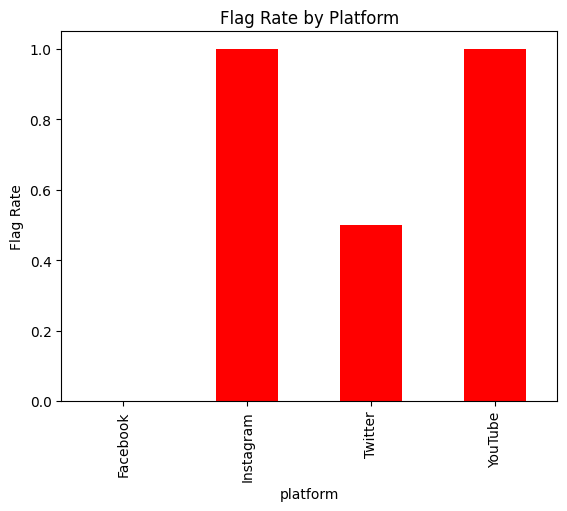

In [6]:
flag_rate = data["flagged"].mean()
print(f"Flagged rate: {flag_rate*100:.2f}%")

by_platform = data.groupby("platform")["flagged"].mean()
print("\nFlag rate by platform:\n", by_platform)

# Plot bar chart
by_platform.plot(kind='bar', title="Flag Rate by Platform", color='red')
plt.ylabel("Flag Rate")
plt.show()


In [7]:
flagged = data[data["flagged"]].copy()
flagged.to_csv("anti_india_flagged_results.csv", index=False)
print("Flagged results saved as anti_india_flagged_results.csv")


Flagged results saved as anti_india_flagged_results.csv
